In [225]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
#import itertools
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn import metrics

### 1. Download the file from the website and then read the data into DataFrame called DF.

In [226]:
import pandas as pd

# DF = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
# DF.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

DF = pd.read_table('seeds_dataset.txt', sep="\t", 
                   names=['area','perimeter','compactness','length of kernel','width of kernel','asymmetry coefficient','length of kernel groove','class'])

DF.head()
#read the downloaded file and describe the type of the attributes of the data
#http://archive.ics.uci.edu/ml/datasets/Iris
#http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial3/tutorial3.html

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### 2. Choose the target attribute.

In [227]:
Y = DF['class'] #choose the target attribute and set into Y
X = DF.drop('class', axis =1) #Save into X for the rest of attributes besieds class(target attribute)

### 3. Divide the data into two subsets: training set (5 records from each class) and testing set (20 records from each class).

In [228]:
#split the data into 2 subsets: training(50sets) and testing(20sets)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.30, stratify = Y, random_state = 1, shuffle = True)  

In [229]:
print(X_train.shape[0])
print(X_test.shape[0])
print(Y_train.shape[0])
print(Y_test.shape[0])

147
63
147
63


# Decision Tree

In [230]:
classifier_DT = tree.DecisionTreeClassifier(criterion='gini', splitter='best',max_depth = 5, min_samples_split=2)
#classifier_gini = tree.DecisionTreeClassifier(criterion='gini', splitter='best',max_depth = 3)

In [231]:
X_test.head()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
145,11.21,13.13,0.8167,5.279,2.687,6.169,5.275
93,18.59,16.05,0.9066,6.037,3.860,6.001,5.877
107,17.63,15.86,0.8800,6.033,3.573,3.747,5.929
80,16.53,15.34,0.8823,5.875,3.467,5.532,5.880
116,18.96,16.20,0.9077,6.051,3.897,4.334,5.750


In [232]:
classifier_DT.fit(X_train, Y_train) #training the classifier by gini index

DecisionTreeClassifier(max_depth=5)

In [233]:
Y_DT_predictions = classifier_DT.predict(X_test) #for gini index
# print(Y_predictions_gini_testing)

In [234]:
print(confusion_matrix(Y_DT_predictions, Y_test)) #set confusion matrix with Y_predictions_gini_train by gini and Y_train


[[16  2  0]
 [ 3 19  0]
 [ 2  0 21]]


In [235]:
print("Accuracy:", classifier_DT.score(X_test, Y_test))

Accuracy: 0.8888888888888888


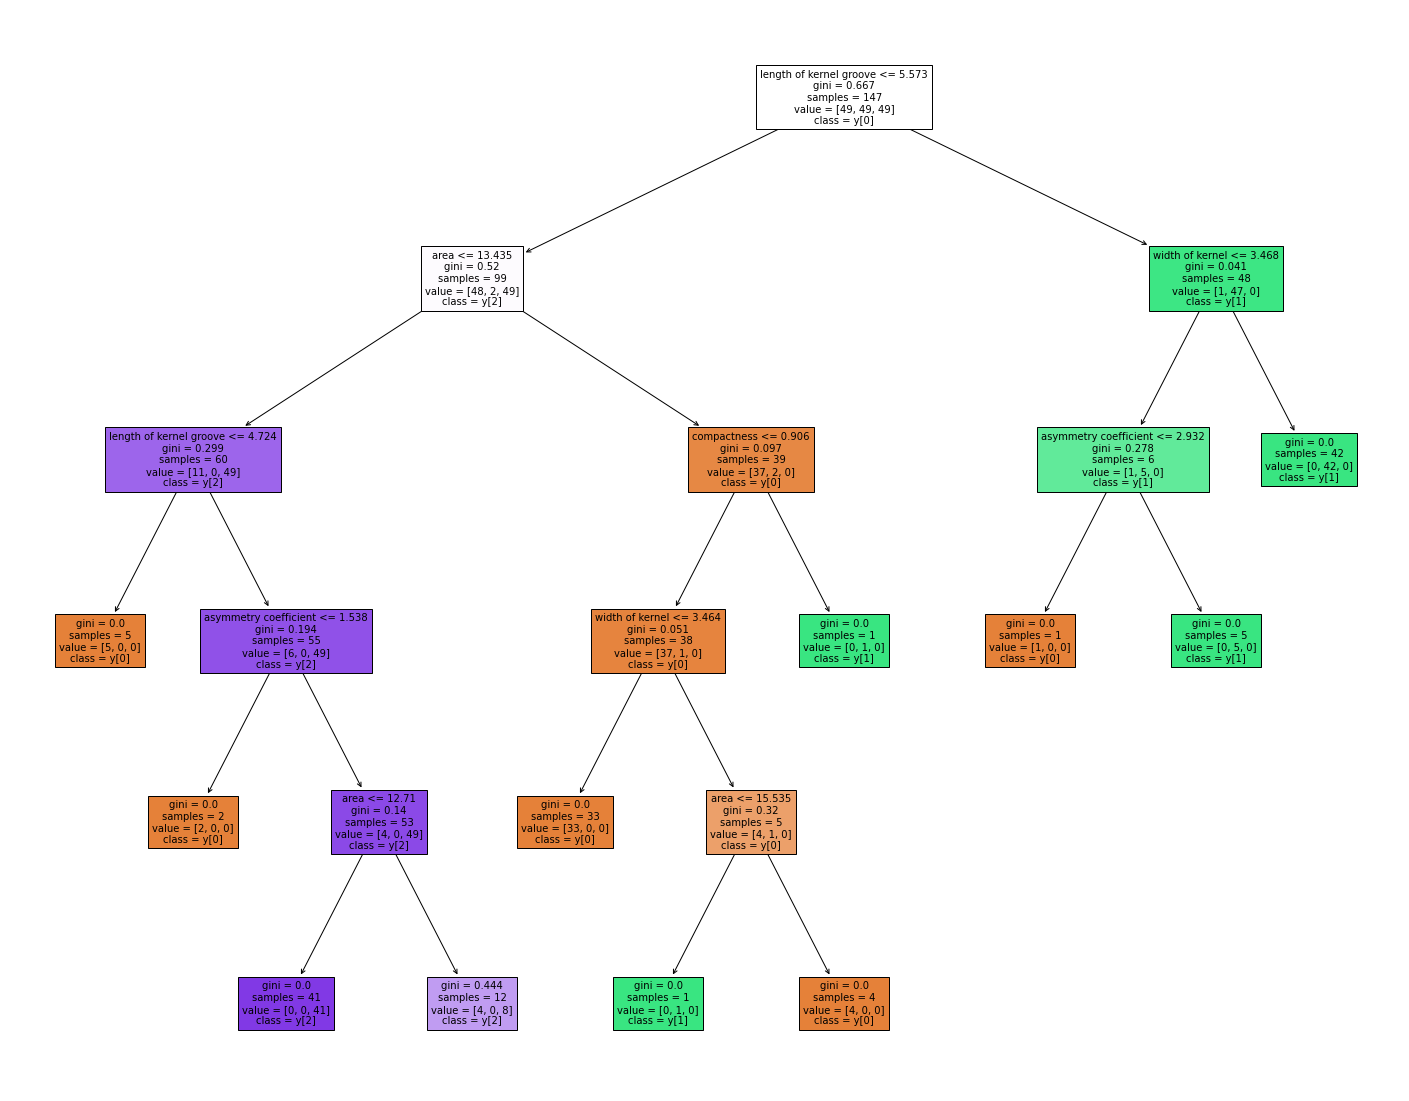

In [236]:
# gini index
X = X_train.append(X_test)
plt.figure(figsize=(25,20))
tree.plot_tree(classifier_DT, filled=True, fontsize=10, max_depth= None,feature_names = list(X.columns), class_names = True)
plt.show()

# SVM

In [266]:
from sklearn import svm

In [282]:
classifier_SVM = svm.SVC(kernel='linear', C=3.0, degree=3, gamma='scale') #Create a svm Classifier/ Radial Basis Function


In [283]:
classifier_SVM.fit(X_train, Y_train) #Train the model using the training sets

SVC(C=3.0, kernel='linear')

In [284]:
Y_SVM_prediction = classifier_SVM.predict(X_test) #Predict the response for test dataset

In [285]:
print(confusion_matrix(Y_test, Y_SVM_prediction)) #build confusion_matrix table with Y_test and Y_predict


[[19  1  1]
 [ 3 18  0]
 [ 0  0 21]]


In [286]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_SVM_prediction)) # Model Accuracy: how much it is accurate between training and testing set


Accuracy: 0.9206349206349206


# Neural Network

In [350]:
from sklearn.neural_network import MLPClassifier

In [351]:
#Multi-layer Perceptron classifier
#This model optimizes the log-loss function using LBFGS or stochastic gradient descent.
classifier_MLP = MLPClassifier(activation='tanh',solver='adam', alpha=0.0001, hidden_layer_sizes=(50,), random_state=None)
#activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’


In [352]:
classifier_MLP.fit(X_train, Y_train) #Train the model using the training sets

/Users/kyoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(50,))

In [353]:
Y_MLP_prediction = classifier_MLP.predict(X_test) #Predict the response for test dataset

In [354]:
print(confusion_matrix(Y_test, Y_MLP_prediction)) #build confusion_matrix table with Y_test and Y_predict


[[18  1  2]
 [ 2 19  0]
 [ 1  0 20]]


In [355]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_MLP_prediction)) # Model Accuracy


Accuracy: 0.9047619047619048


# Random Forest

In [249]:
from sklearn.ensemble import RandomForestClassifier

In [250]:
classifier_RF = RandomForestClassifier(n_estimators=100,criterion='gini',min_samples_split=2,min_samples_leaf=1,max_features='auto')


In [251]:
classifier_RF.fit(X_train, Y_train) #Train the model using the training sets

RandomForestClassifier()

In [252]:
Y_RF_prediction = classifier_RF.predict(X_test) #Predict the response for test dataset

In [253]:
print(confusion_matrix(Y_test, Y_RF_prediction)) #build confusion_matrix table with Y_test and Y_predict


[[19  1  1]
 [ 1 20  0]
 [ 0  0 21]]


In [254]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_RF_prediction)) # Model Accuracy: how much it is accurate


Accuracy: 0.9523809523809523
